In [1]:
from lazylib import make, GoogLeNet, device, takeConfusionMatrix, takeRocCurve, now, takeFromDisk
import torch

/home/luizp/projects/pibit/pibit/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n = now()
epocs = 1
model = make(
    EPOCHS=epocs, 
    BATCH_SIZE=128, 
    LEARNING_RATE=1e-3, 
    csv_path="/home/luizp/projects/pibit/src/data/processed/csv/cicClean.csv",
    out_path=f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}',
    MODEL=GoogLeNet().to(device()), 
    SEED=1701,
    xcol=2
    ) 
torch.save(model.state_dict(), f"/home/luizp/projects/pibit/src/0utput/models/{n}_alexnet_{epocs}.nnModel")

[31-07-2024 15-50-50] Epoch 001 Acc: 0.9987 Loss: 24.14025054: 100%|██████████| 782/782 [02:24<00:00,  5.40it/s]
[31-07-2024 15-55-59] Epoch 001 Val. Acc: 1.0000 Val. Loss: 0.00031164: 100%|██████████| 7032/7032 [05:07<00:00, 22.85it/s]
[31-07-2024 15-58-38] Epoch 002 Acc: 1.0000 Loss: 0.00052266: 100%|██████████| 782/782 [02:29<00:00,  5.22it/s]
[31-07-2024 16-03-45] Epoch 002 Val. Acc: 1.0000 Val. Loss: 0.00034533: 100%|██████████| 7032/7032 [05:06<00:00, 22.96it/s]
[31-07-2024 16-06-28] Epoch 003 Acc: 1.0000 Loss: 0.00039187: 100%|██████████| 782/782 [02:33<00:00,  5.10it/s]
[31-07-2024 16-11-56] Epoch 003 Val. Acc: 1.0000 Val. Loss: 0.00061347: 100%|██████████| 7032/7032 [05:25<00:00, 21.57it/s]
[31-07-2024 16-14-39] Epoch 004 Acc: 1.0000 Loss: 0.00031473: 100%|██████████| 782/782 [02:33<00:00,  5.08it/s]
[31-07-2024 16-20-03] Epoch 004 Val. Acc: 1.0000 Val. Loss: 0.00045412: 100%|██████████| 7032/7032 [05:22<00:00, 21.80it/s]
[31-07-2024 16-22-44] Epoch 005 Acc: 0.9972 Loss: 3.506

Finished experiment!


In [4]:
train = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-train--10.txt')
valid = takeFromDisk(f'/home/luizp/Downloads/0proj/pibit/src/0utput/text/{n}-valid--10.txt')

In [5]:
import numpy as np
from sklearn.metrics import auc, roc_curve, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

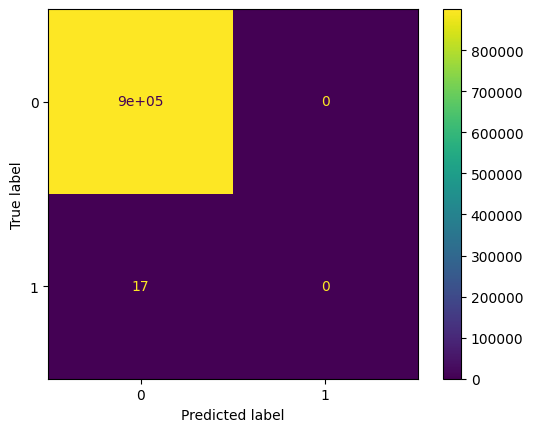

In [8]:
ConfusionMatrixDisplay(np.array(valid[10]['confusion_matrix'])).plot()

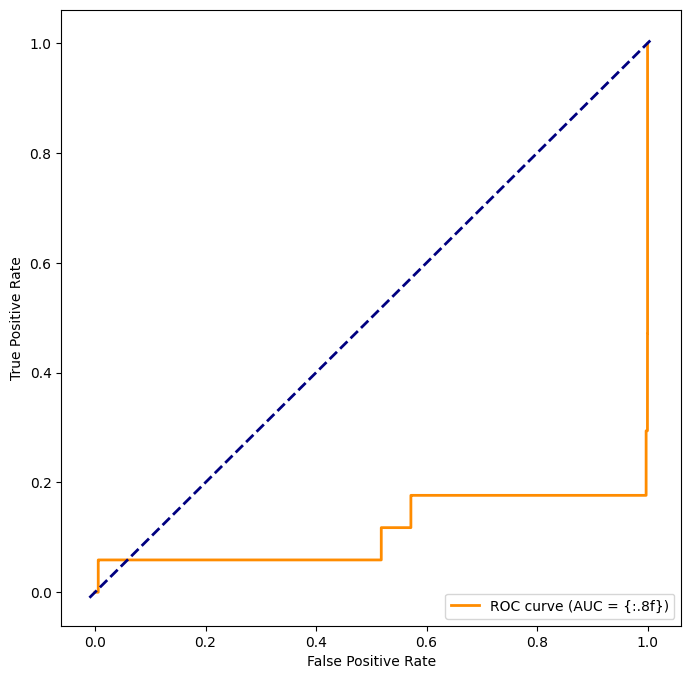

In [7]:
takeRocCurve(valid)